In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.6.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Quadratic

We want to construct a quadratic polynomal through that points $x_{i-1}$, $x_i$, $x_{i+1}$ that gives the correct averages,
$f_{i-1}$, $f_i$, and $f_{i-1}$ when integrated over the volume, e.g.

$$\frac{1}{\Delta x} \int_{x_{i-1/2}}^{x_{i+1/2}} f(x) dx = f_i$$

There are 3 unknowns in the quadratic and three constraints, so this is a linear system we can solve.

Define the quadratic polynomial

In [2]:
a, b, c = symbols("a b c")
x0 = symbols("x0")
f = a*(x-x0)**2 + b*(x-x0) + c
f

In [3]:
dx = symbols("\Delta")

### constraints

Define the 3 constraint equations---here we set them up construct $A$, $B$, and $C$ as the integrals over the 3 control volumes

In [4]:
fm, f0, fp = symbols("f_{i-1} f_i f_{i+1}")
#xm32, xm12, xp12, xp32 = symbols("x_{i-3/2} x_{i-1/2} x_{i+1/2} x_{i+3/2}")
xm32 = x0 - Rational(3,2)*dx
xm12 = x0 - Rational(1,2)*dx
xp12 = x0 + Rational(1,2)*dx
xp32 = x0 + Rational(3,2)*dx

interfaces

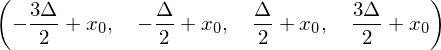

In [5]:
xm32, xm12, xp12, xp32

In [6]:
A = simplify(integrate(f/dx, (x, xm32, xm12)))
B = simplify(integrate(f/dx, (x, xm12, xp12)))
C = simplify(integrate(f/dx, (x, xp12, xp32)))

The analytic forms of the integrals

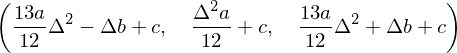

In [7]:
A, B, C

Our linear system is now:

$$A = f_{i-1}$$
$$B = f_i$$
$$C = f_{i+1}$$

Now find the coefficients of the polynomial

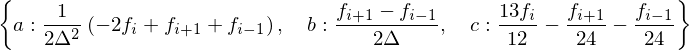

In [8]:
coeffs = solve([A-fm, B-f0, C-fp], [a,b,c])
coeffs

And in pretty form, here's the polynomial

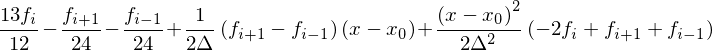

In [9]:
f.subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c])

### Cubic

We want to construct a cubic polynomal through that points $x_{i-2}$, $x_{i-1}$, $x_i$, $x_{i+1}$ that gives the correct averages,
$f_{i-2}$, $f_{i-1}$, $f_i$, and $f_{i-1}$ when integrated over the volume of each zone

In [10]:
a, b, c, d = symbols("a b c d")
f = a*(x-x0)**3 + b*(x-x0)**2 + c*(x-x0) + d
f

Now perform the integals of $f(x)$ over each zone

In [11]:
fm2, fm, f0, fp = symbols("f_{i-2} f_{i-1} f_i f_{i+1}")
xm52 = x0 - Rational(5,2)*dx
xm32 = x0 - Rational(3,2)*dx
xm12 = x0 - Rational(1,2)*dx
xp12 = x0 + Rational(1,2)*dx
xp32 = x0 + Rational(3,2)*dx

interfaces

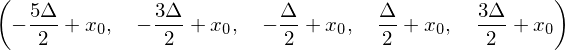

In [12]:
xm52, xm32, xm12, xp12, xp32

In [13]:
A = simplify(integrate(f/dx, (x, xm52, xm32)))
B = simplify(integrate(f/dx, (x, xm32, xm12)))
C = simplify(integrate(f/dx, (x, xm12, xp12)))
D = simplify(integrate(f/dx, (x, xp12, xp32)))

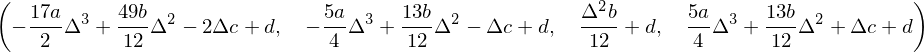

In [14]:
A, B, C, D

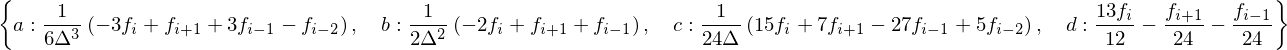

In [15]:
coeffs = solve([A-fm2, B-fm, C-f0, D-fp], [a,b,c,d], check=False)
coeffs

and the pretty form of the polynomial

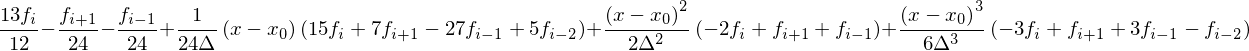

In [16]:
fc = f.subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d])
fc

this interpolant is symmetric about the $i-1/2$ interface---let's see the value there

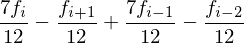

In [17]:
fc.subs(x,x0-Rational(1,2)*dx)

Note that this is the interpolating polynomial used to find the interface states in PPM (Colella & Woodward 1984)

## Quartic

Now we define a quartic polynomial that gives the correct averages over 5 zones, $x_{i-2}$, $x_{i-1}$, $x_i$, $x_{i+1}$, $x_{i+2}$,
with zone averages $f_{i-2}$, $f_{i-1}$, $f_i$, $f_{i+1}$, $f_{i+2}$

In [18]:
a, b, c, d, e = symbols("a b c d e")
x0 = symbols("x0")
f = a*(x-x0)**4 + b*(x-x0)**3 + c*(x-x0)**2 + d*(x-x0) + e
f

Now we perform the integrals of $f(x)$ over each zone

In [19]:
fm2, fm, f0, fp, fp2 = symbols("f_{i-2} f_{i-1} f_i f_{i+1} f_{i+2}")
#xm32, xm12, xp12, xp32 = symbols("x_{i-3/2} x_{i-1/2} x_{i+1/2} x_{i+3/2}")
xm52 = x0 - Rational(5,2)*dx
xm32 = x0 - Rational(3,2)*dx
xm12 = x0 - Rational(1,2)*dx
xp12 = x0 + Rational(1,2)*dx
xp32 = x0 + Rational(3,2)*dx
xp52 = x0 + Rational(5,2)*dx

interfaces

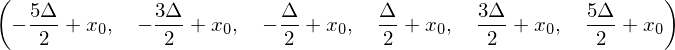

In [20]:
xm52, xm32, xm12, xp12, xp32, xp52

In [21]:
A = simplify(integrate(f/dx, (x, xm52, xm32)))
B = simplify(integrate(f/dx, (x, xm32, xm12)))
C = simplify(integrate(f/dx, (x, xm12, xp12)))
D = simplify(integrate(f/dx, (x, xp12, xp32)))
E = simplify(integrate(f/dx, (x, xp32, xp52)))

The analytic form of the constraints

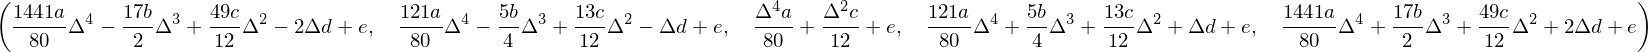

In [22]:
A, B, C, D, E

Now find the coefficients

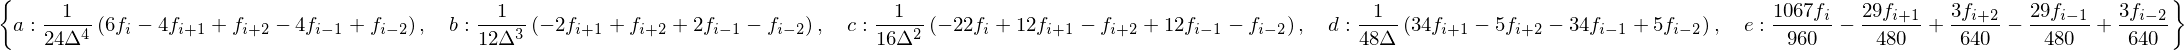

In [23]:
coeffs = solve([A-fm2, B-fm, C-f0, D-fp, E-fp2], [a,b,c,d,e], check=False)
coeffs

and the pretty form of the polynomial

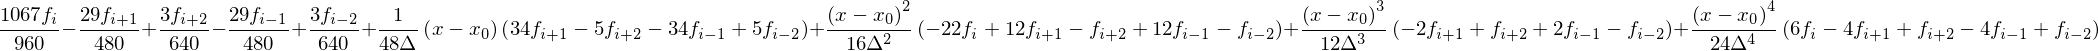

In [24]:
f.subs(a,coeffs[a]).subs(b,coeffs[b]).subs(c,coeffs[c]).subs(d,coeffs[d]).subs(e,coeffs[e])